# **21FS Big-Data Analytics - Course Project**

## **Bankruptcy Prediction**


**Group Members:** 

Tiantian Luo (20-752-507, tiantian.luo@uzh.ch) <br> 
Shiyao Li (20-752-572, shiyao.li@uzh.ch) <br> 
Yuning Yu (20-745-691, yuning.yu@uzh.ch) <br> 
Liyuan Rong (19-770-411, liyuan.rong@uzh.ch) <br> 
Jinqiao Li (20-745-063, jinqiao.li@uzh.ch)

# Data Set Description

**Introduction**

The aim of bankruptcy prediction is to predict the likelihood that a company may go bankrupt based on the companies' data including the financial ratios (FRs) and corporate governance indicators (CGIs). Effective bankruptcy prediction is critical for financial institutions to make appropriate lending decisions. In general, the selection of input variables (features), and the use of prediction techniques such as statistical and machine learning models, are the two most important factors to consider in the prediction performance.

In this project, we use a real-world company dataset from Taiwan to assess the prediction performance of four different machine learning models, and employ feature selection strategy to look for  combinations of FRs and CGIs that are most relevant to bankruptcy prediction.

**Data source**

The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction#

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. The sample companies had at least three years of complete public information before the occurrence of the financial crisis. There were sufficient number of comparable companies of similar size in the same industry for comparison of the bankrupt and non-bankrupt cases. The sample companies are from the manufacturing industry (346 industrial and electronics companies, the service industry (39 shipping, tourism, and retail companies), and others (93 companies), but no financial companies.

**Analysis Tasks**

The analysis tasks of our project are:

1. Comparing the prediction performance between different models.

2. Looking for the features with the most discriminatory power relevant to prediction.

**Relevant Paper**

Liang, D., Lu, C.-C., Tsai, C.-F., and Shih, G.-A. (2016) Financial Ratios and Corporate Governance Indicators in Bankruptcy Prediction: A Comprehensive Study. European Journal of Operational Research, vol. 252, no. 2, pp. 561-572.
https://www.sciencedirect.com/science/article/pii/S0377221716000412

Import all necessary labraries


In [1]:
# import libraries

#from google.colab import files

# data exploration
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# package imports
from sklearn.preprocessing import MinMaxScaler
import warnings

# building models
from sklearn import tree,svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import graphviz

from sklearn.feature_selection import SelectKBest





from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
#This cell only for colab

# Data Exploration

The first step of our data exploration is to get an overview of the correlation relations of features and target in the data set, so that we can do necessary data cleaning and processing before the prediction analysis.



## Histograms & Correlations

(6819, 96)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-

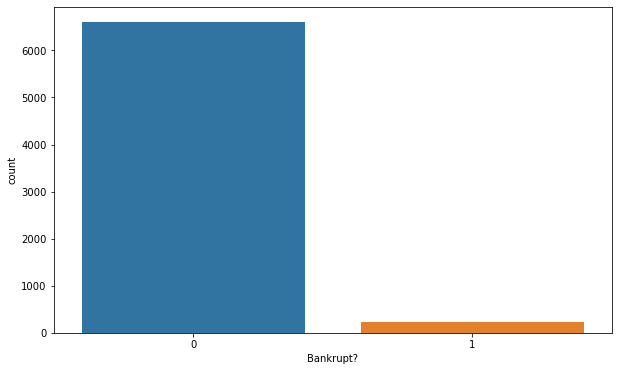

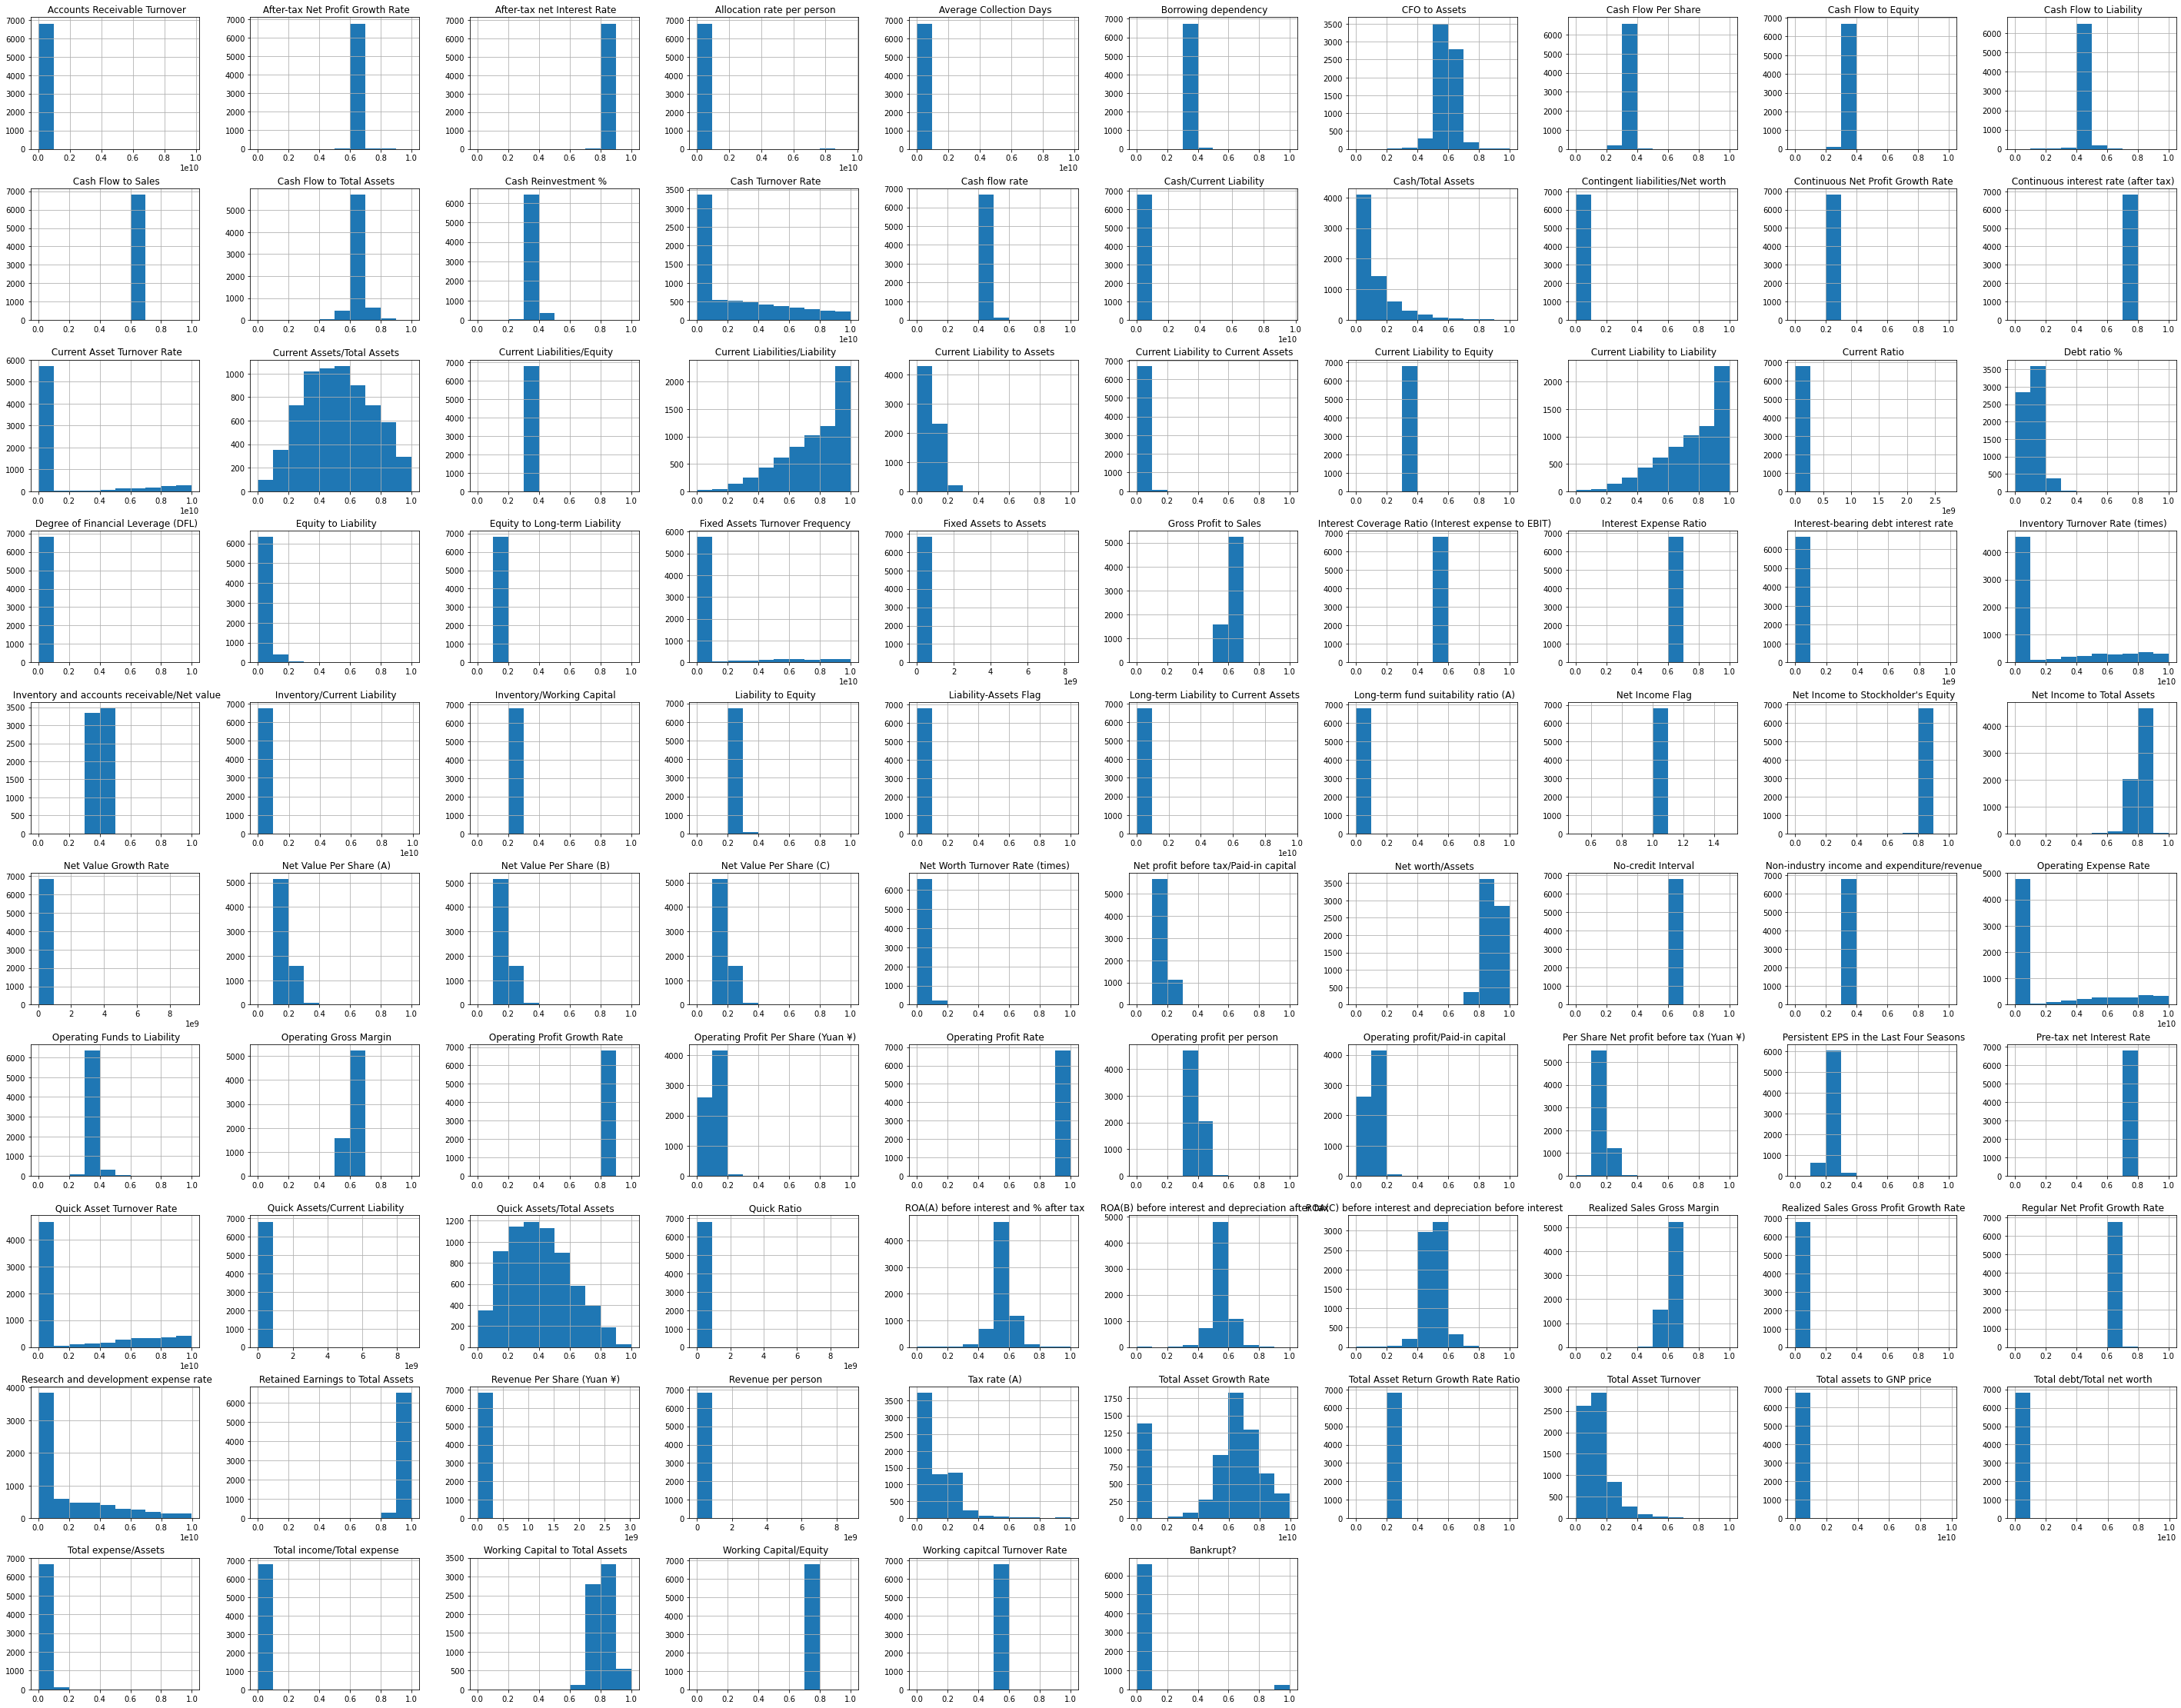

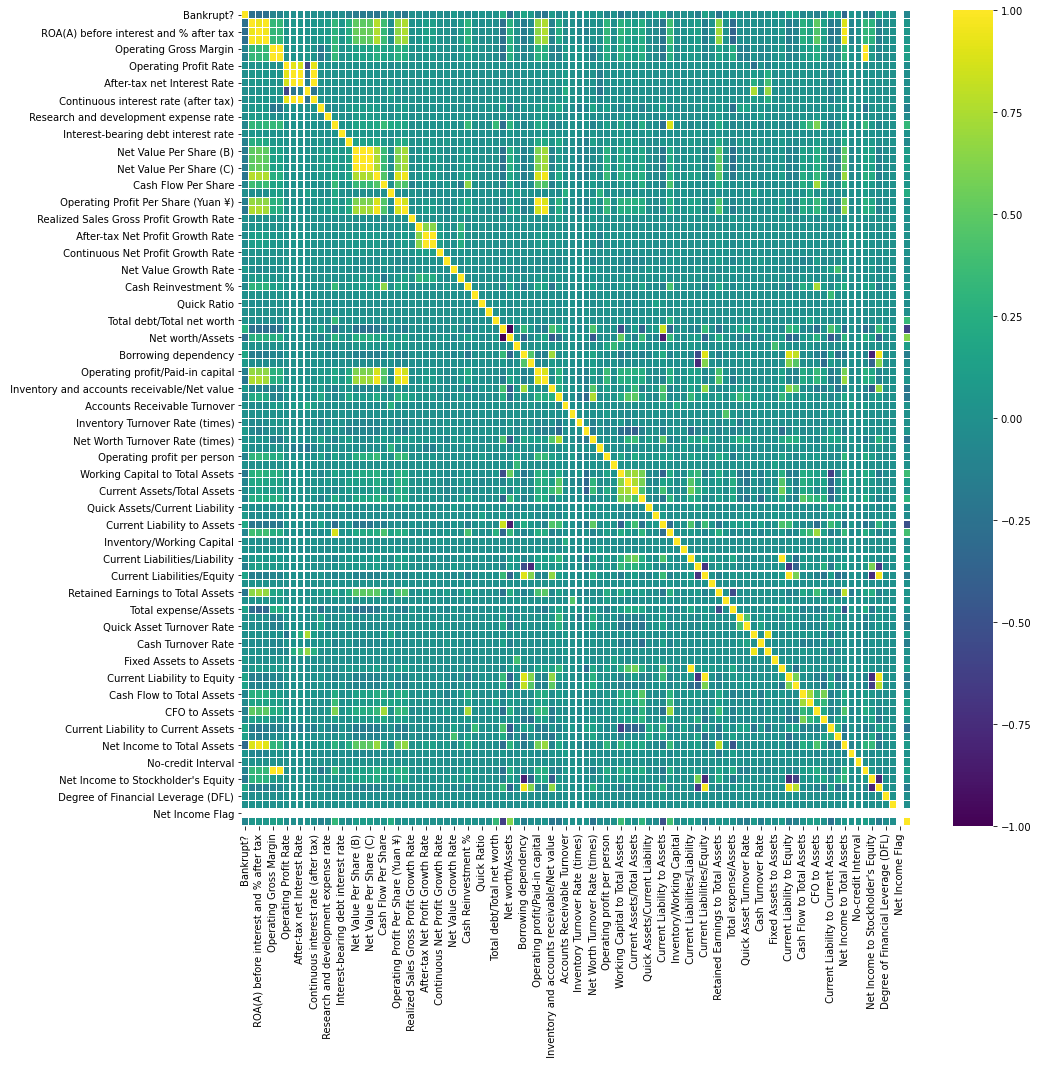

NameError: name 'corrmat' is not defined

In [3]:

bankruptcy_data=pd.read_csv("data.csv")

print(bankruptcy_data.shape)
bankruptcy_data.info()
bankruptcy_data.describe()

#Bankruptcy distributions
plt.figure(figsize=(10,6))
sns.countplot(data=bankruptcy_data,x='Bankrupt?')
plt.show()

#Histograms of features
bankruptcy_data.hist(figsize=(50,40))
plt.show()

#heatmap
corr = bankruptcy_data.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, ax = ax, cmap = 'viridis', linewidth = 0.1)
plt.show()

# The ten most relevent features
k=10
cols=corrmat.nlargest(k,'Bankrupt?')['Bankrupt?'].index
cm=np.corrcoef(bankruptcy_data[cols].values.T)
sns.set(font_scale=1.25)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()



**Conclusion:**

**Histogram:**
Here we used histogram to show the number of bankrupt and non-bankrupt companies. We can observe that the dataset is very imbalanced. For this kind of dataset, we would pay more attention on models' performance of the minority class. That's because minority class ususally contains more inportant information compared to the majority. In our project, the significance of predicting whether a company is bankrupted is to find out the factors leading to the bankruptcy and try to avoid them in the future business activities.

In the later part, we used stratified sampling to address this issue before building models.

Histograms are also used to show the distribution of these features.

**Correlations:**
We also used heatmap to show the correlations matrix. And we find that some featuers have strong correlation by using the spearman method.




# Preprocessing

## Normalization

In [4]:
# package imports

pd.set_option('max_columns', None)
warnings.filterwarnings("ignore")

data_pure = pd.read_csv("./data.csv")
# get info of data and check null and duplicate
data_pure.head()
data_pure.info()
data_pure.isnull().sum().sum()
duplicate_rows_data_pure = data_pure[data_pure.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data_pure.shape)
# check the valued whether they are min-max-scaled
over_max_count = 0
over_max_cols = []
under_min_count = 0
under_min_cols = []
for col in data_pure.columns:
    max_value = max(data_pure[col])
    min_value = min(data_pure[col])

    if max_value > 1:
        over_max_count += 1
        over_max_cols.append(col)
    if min_value < 0:
        under_min_count += 1
        under_min_cols.append(col)

    print('column : {}'.format(col))
    print('max : {}'.format(max_value))
    print('min : {}'.format(min_value))
print('over max count : ', over_max_count)
print('under min count : ', under_min_count)
# data normalization
scaler_norm = MinMaxScaler()
data_pure[over_max_cols] = scaler_norm.fit_transform(data_pure[over_max_cols])
data_pure[over_max_cols[0]].max()
# test
for col in data_pure[over_max_cols]:
    print('column : {}'.format(col))
    print('max : {}'.format(max_value))
    print('min : {}'.format(min_value))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

## Feature Selection

This data set contains 95 features which can be divided into 2 large sets: financial ratios (FRs) and Corporate governance indicators (CGIs), and further smaller subsets. The aim of feature selection or dimensionality reduction is to reduce irrelevant or redundant features and find representative features having more discriminatory power.

**Catetories of features**

FRs can be classified into seven categories: solvency, profitability, cash flow ratios, capital structure ratios, turnover ratios, growth, and others.

CGIs can be classified into five categories: board structure, ownership structure, cash flow rights, key person retained, and others.

The paper shows that the FR categories of solvency and profitability，and the CGI categories of board structure and ownership structure are the most important features in bankruptcy prediction. 

Table of Features

FR: solvency, profitability

CGI: board structure, ownership structure


(The feature names in this data set are different from those in the appendix of the paper. How to map to the categories?)


**Selection methods**

There are many methods for feature selection, the mostly used ones include the filter based methods of stepwise discriminant analysis (SDA), stepwise logistic regression (SLR), t-testing, and the wrapper based methods of the genetic algorithm (GA) and recursive feature elimination (RFE).

In this project, we employ the K-Best feature selection method to perform dimensionality reduction and identify features with the most discriminatory power, and compare the difference of the set of selected features to the paper.

Since the data set is imbalanced, we randomly choose the same number of non-bankrupt companies as the bankrupt ones. 



In [5]:

data = pd.read_csv('data.csv')

# column 'Net Income Flag' is constant 1, drop
data = data.drop([' Net Income Flag'], axis=1)

In [26]:
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,0.000126,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,0.000290,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0

In [29]:
a=np.array([[1,2,3,4],[1,6,7,8]])
a[:,0]==1

array([ True,  True])

In [6]:
def generate_balanced_data(data, trainingrate=0.8):
    
    # divide data into bankrupt and not-bankrupt cases
    #not_bankrupt = data[data['Bankrupt?'] == 0]
    not_bankrupt = data[data['Bankrupt?'] == 0]
    bankrupt = data[data['Bankrupt?'] == 1]
        
    # randomly sample the same number of cases from not-bankrupt as bankrupt
    n_not = bankrupt.shape[0]
    not_bankrupt_sample = not_bankrupt.sample(n_not)
    
    # concatenate sampled not-bankrupt cases and bankrupt cases to form the balanced data set
    data_balanced = pd.concat([not_bankrupt_sample, bankrupt])
    
    # randomly choose 80% from the balanced data set as training data, the rest 20% as test data
    X_full=data_balanced.iloc[:,1:].values
    y_full=data_balanced.iloc[:,0].values
    
    n = data_balanced.shape[0]
    shuffler = np.random.permutation(n)
    X_train = X_full[shuffler[:int(n*trainingrate)]]
    X_test = X_full[shuffler[int(n*trainingrate):]]
    y_train = y_full[shuffler[:int(n*trainingrate)]]
    y_test = y_full[shuffler[int(n*trainingrate):]]

    return X_train,y_train,X_test,y_test

In [7]:


# run 100 times of selection and record each time the indexes of 10 selected features
selected_features = np.array([])
for i in range(100):    
    X_train_b, y_train_b, X_test_b, y_test_b = generate_balanced_data(data)
    SKBf = SelectKBest().fit(X_train_b, y_train_b)
    select = SKBf.get_support(indices=True)
    
    selected_features = np.append(selected_features, select)

In [8]:
# frequency counts
(unique, counts) = np.unique(selected_features, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies_sorted = np.flipud(frequencies[np.argsort(frequencies[:, 1])])

frequencies_sorted

array([[37., 98.],
       [ 0., 96.],
       [36., 96.],
       [42., 88.],
       [18., 87.],
       [22., 83.],
       [ 2., 82.],
       [16., 60.],
       [ 1., 60.],
       [68., 57.],
       [15., 57.],
       [17., 39.],
       [85., 35.],
       [53., 29.],
       [67., 16.],
       [59., 12.],
       [21.,  4.],
       [41.,  1.]])

In [9]:
feature_indexes = frequencies_sorted[:10,0]+1
feature_indexes = np.append(0,feature_indexes)
feature_indexes

array([ 0., 38.,  1., 37., 43., 19., 23.,  3., 17.,  2., 69.])

In [10]:
# visualization of selected features
feature_space = data.iloc[:, feature_indexes]
pd.set_option('display.max_rows', 6)
feature_space

,Bankrupt?,Net worth/Assets,ROA(C) before interest and depreciation before interest,Debt ratio %,Net profit before tax/Paid-in capital,Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),ROA(B) before interest and depreciation after tax,Net Value Per Share (A),ROA(A) before interest and % after tax,Total income/Total expense
0,1,0.792424,0.370594,0.207576,0.137757,0.169141,0.138736,0.405750,0.147950,0.424389,0.002022
1,1,0.828824,0.464291,0.171176,0.168962,0.208944,0.169918,0.516730,0.182251,0.538214,0.002226
2,1,0.792484,0.426071,0.207516,0.148036,0.180581,0.142803,0.472295,0.177911,0.499019,0.002060
...,...,...,...,...,...,...,...,...,...,...,...
6816,0,0.961061,0.472725,0.038939,0.172287,0.210929,0.173232,0.520638,0.269521,0.533744,0.002239
6817,0,0.913021,0.506264,0.086979,0.182498,0.228326,0.185584,0.554045,0.213392,0.559911,0.002395
6818,0,0.985851,0.493053,0.014149,0.179911,0.227758,0.182119,0.549548,0.220766,0.570105,0.002791


**Visualization of selected features**

In order to show the differences between bankrupt companies and normal ones, we visualize the distribution of selected features of these two kinds of companies to exibit the characteristics of the financial crises in the bankrupt companies.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def feature_visualization(feature_space):
 
    not_bankrupt = feature_space[feature_space['Bankrupt?'] == 0]
    bankrupt = feature_space[feature_space['Bankrupt?'] == 1]
    
    n_not = bankrupt.shape[0]
    not_bankrupt_sample = not_bankrupt.sample(n_not)
    
    feature_space_balanced = pd.concat([not_bankrupt_sample, bankrupt])
    features = list(feature_space_balanced.keys()[1:])
    
    fig, ax = plt.subplots(5,2, figsize=(20,20))
    ax = ax.ravel()
    position = 0
    
    for i in features:
        #sns.histplot(data=feature_space_balanced, x='Bankrupt?', y=i, ax=ax[position])
        sns.histplot(data=feature_space_balanced, x=i, hue="Bankrupt?", ax=ax[position])
        position += 1
    plt.show()
    
    return None

AttributeError: module 'seaborn' has no attribute 'histplot'

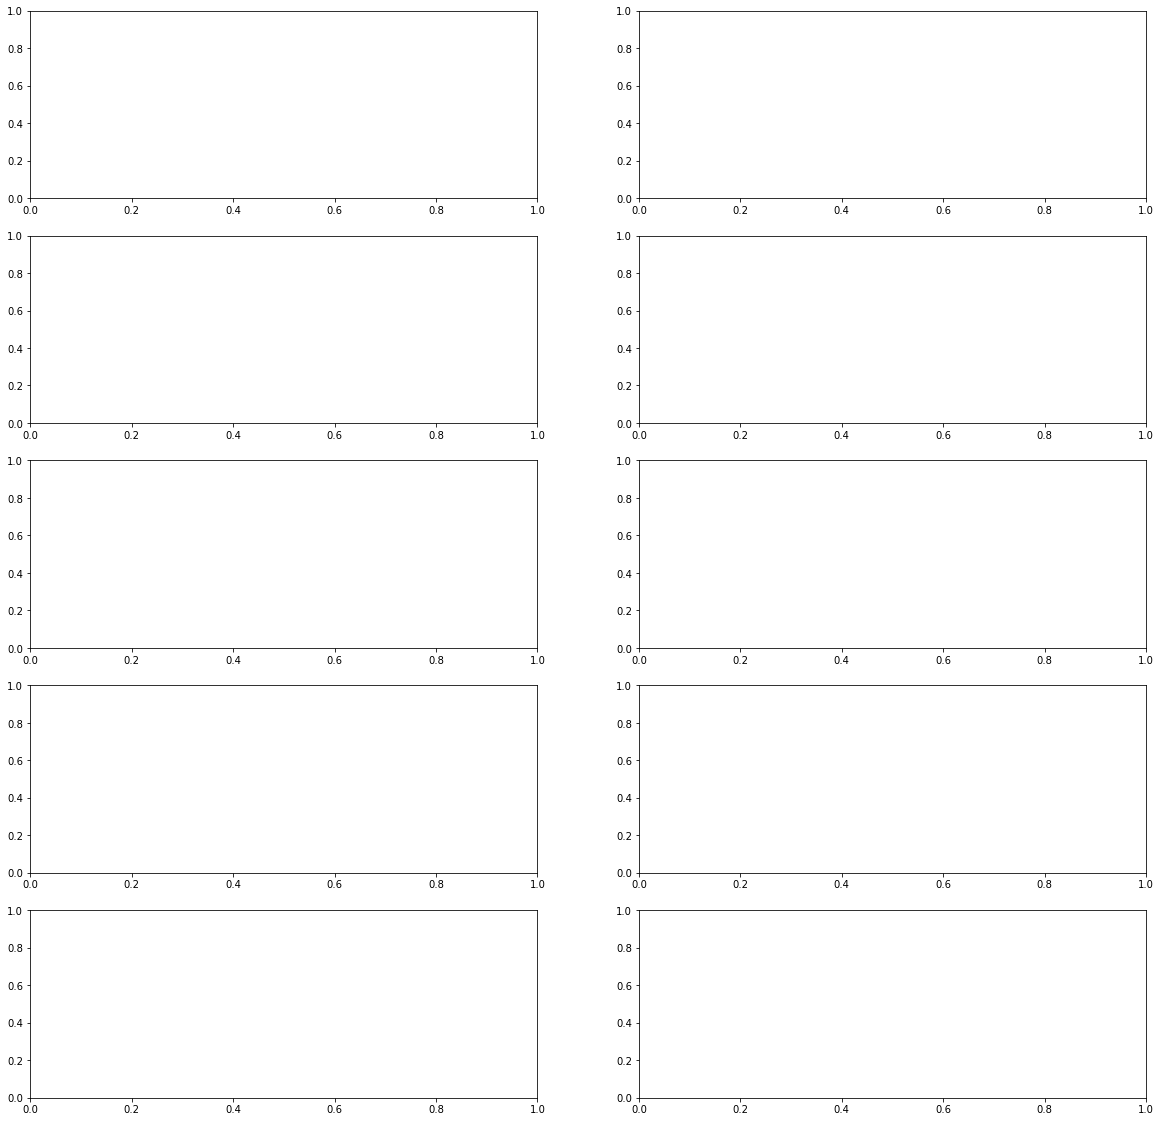

In [12]:
feature_visualization(feature_space)

The differences between bankrupt companies and not-bankrupt ones with regard to the selected features are apparently displayed in the above histogram plots, which means these features could be employed for general assessment of the possibility of a company going bankrupt when the whole set of relevant data are limited or data of other features are not available.

The prediction accuracy of support vector machine prediction model applied on this selected set of features. 


In [13]:
# use balanced data set and selected features for classification
X_train_o, y_train_o, X_test_o, y_test_o = generate_balanced_data(data)
X_train_f, y_train_f, X_test_f, y_test_f = generate_balanced_data(feature_space)

from sklearn import svm

def SVM(X_train,y_train,X_test,y_test):
    clf_svm = svm.SVC()
    clf_svm.fit(X_train, y_train)
    y_predict_svm = clf_svm.predict(X_test)
    rate_svm = np.mean(y_predict_svm == y_test)
    return rate_svm,clf_svm

rate_o, _ = SVM(X_train_o, y_train_o, X_test_o, y_test_o)
rate_f, _ = SVM(X_train_f, y_train_f, X_test_f, y_test_f)

print(f'The prediction accuracy on balanced data set using all features is {rate_o}')  
print(f'The prediction accuracy on balanced data set using selected features is {rate_f}')

The prediction accuracy on balanced data set using all features is 0.5227272727272727
The prediction accuracy on balanced data set using selected features is 0.9090909090909091


In [14]:
# use unbalanced data set and selected features
def generate_data(data,trainingrate=0.8):
    
    y_full=data.iloc[:,0].values
    X_full=data.iloc[:,1:].values
    
    n = y_full.shape[0]
    shuffler = np.random.permutation(n)
    X_train = X_full[shuffler[:int(n*trainingrate)]]
    X_test = X_full[shuffler[int(n*trainingrate):]]
    y_train = y_full[shuffler[:int(n*trainingrate)]]
    y_test = y_full[shuffler[int(n*trainingrate):]]
    
    return X_train,y_train,X_test,y_test

In [15]:
X_train_o_ub,y_train_o_ub,X_test_o_ub,y_test_o_ub = generate_data(data)
X_train_f_ub,y_train_f_ub,X_test_f_ub,y_test_f_ub = generate_data(feature_space)

rate_o_ub, _ = SVM(X_train_o_ub,y_train_o_ub,X_test_o_ub,y_test_o_ub)
rate_f_ub, _ = SVM(X_train_f_ub,y_train_f_ub,X_test_f_ub,y_test_f_ub)

print(f'The prediction accuracy on unbalanced data set using all features is {rate_o_ub}')  
print(f'The prediction accuracy on unbalanced data set using selected features is {rate_f_ub}')

The prediction accuracy on unbalanced data set using all features is 0.9721407624633431
The prediction accuracy on unbalanced data set using selected features is 0.9758064516129032


**Conclusion:**

When the data set is relatively small and the balanced, feature selection can significantly improve the prediction accuracy, while for large unbalanced data set, the improvement is negligible.

## Outliers Analysis



The aim of this part is to explore outliers that exist in the data by using box diagrams. From this plot, wen can find out that there are plenty of outliers in this dataset.  

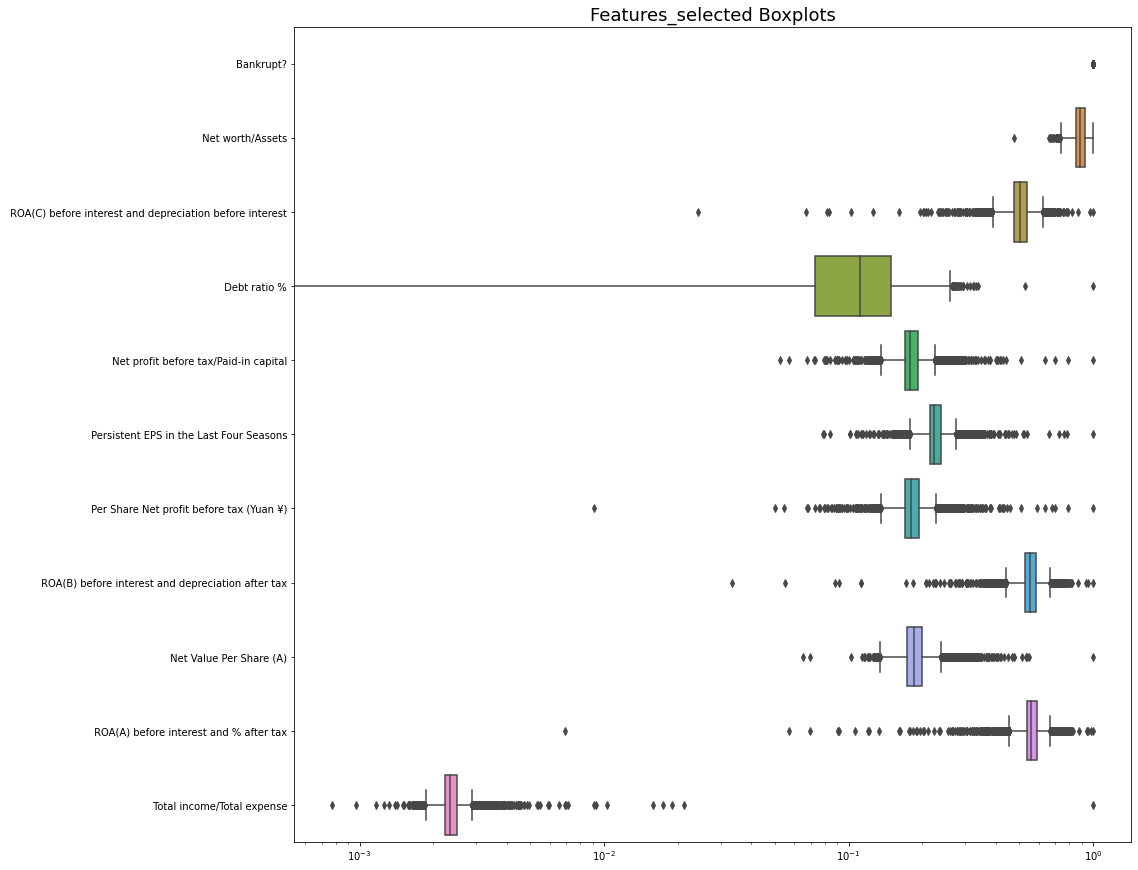

In [16]:
# Visulize outliers using boxplots

plt.figure(figsize=(15,15))
ax =sns.boxplot(data=feature_space,orient="h")
ax.set_title('Features_selected Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

# Prediction Models

There are many well-known machine learning models for prediction tasks. In this project, we compare the performance of the following prediction models:

1. Decision tree, 

2. Support vector machine, 

3. Logistic regression, 

4. Neural network

**Balancing classes**

It should be noted that there is a significant difference between the number of bankrupt and non-bankrupt cases, this results in a class imbalance problem, which is likely to lead to a degradation in the final prediction performance. 

To address this problem, we use the method of stratified sampling to collect the same number of bankrupt and non-bankrupt cases. The balanced dataset is composed of 239 bankrupt and 239 non- bankrupt cases, with each case represented by 95 FRs and 95 CGIs as the input variables. Moreover, each of the variables is normalized into the range from 0 to 1.

**Cross validation**

To avoid variability of the samples, which may affect the model performance and minimize any bias effect, the 5-fold cross validation method is used to divide the dataset into 5 distinct training and testing subsets with which to train and test the prediction model. The final prediction performance is based on the average of the 5 testing results over the 5 testing subsets individually.

In [17]:
def generate_data(X_full,y_full,trainingrate=0.8):
    n = y_full.shape[0]
    shuffler = np.random.permutation(n)
    X_train = X_full[shuffler[:int(n*trainingrate)]]
    X_test = X_full[shuffler[int(n*trainingrate):]]
    y_train = y_full[shuffler[:int(n*trainingrate)]]
    y_test = y_full[shuffler[int(n*trainingrate):]]
    return X_train,y_train,X_test,y_test

In [18]:
def evaluate(y,t):
    return np.mean(y == t)

In [19]:
y_full=bankruptcy_data.iloc[:,0].values.reshape(-1,1)
X_full=bankruptcy_data.iloc[:,1:].values
X_train,y_train,X_test,y_test=generate_data(X_full,y_full)

## Decision tree

In [20]:
def Dicision_Tree(X_train,y_train,X_test,y_test):
    clf_tree = tree.DecisionTreeClassifier()
    clf_tree.fit(X_train, y_train)
    y_predict_tree = clf_tree.predict(X_test)
    rate_tree = evaluate(y_predict_tree,y_test)
    return rate_tree,clf_tree

## Support Vector Machine

In [21]:
def SVM(X_train,y_train,X_test,y_test):
    clf_svm = svm.SVC()
    clf_svm.fit(X_train, y_train)
    y_predict_svm = clf_svm.predict(X_test)
    rate_svm = evaluate(y_predict_svm,y_test)
    return rate_svm,clf_svm

## Logistic regression

In [22]:
def Logistic_Regression(X_train,y_train,X_test,y_test):
    clf_lr = LogisticRegression()
    clf_lr.fit(X_train, y_train)
    y_predict_lr = clf_lr.predict(X_test)
    rate_lr = evaluate(y_predict_lr,y_test)
    return rate_lr,clf_lr

## Neural Network

- No. of hidden layers: 1
- No. of hidden layer nodes: 10
- Learning epochs: 

In [23]:
def NN(X_train,y_train,X_test,y_test):
    clf_nn = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(10,), random_state=1)
    clf_nn.fit(X_train, y_train)
    y_predict_nn = clf_nn.predict(X_test)
    rate_nn = evaluate(y_predict_nn,y_test)
    return rate_nn,clf_nn

## Comparison

In [32]:
def compare(X_full,y_full,bankruptcy_data,n_nums=10):
    test_err=np.zeros((4,10))
    for i in range(n_nums):
        X_train,y_train,X_test,y_test=generate_data(X_full,y_full)
        #X_train,y_train,X_test,y_test=generate_balanced_data(bankruptcy_data)
        test_err[0,i],Tree=Dicision_Tree(X_train,y_train,X_test,y_test)
        test_err[1,i],Svm=SVM(X_train,y_train,X_test,y_test)
        test_err[2,i],Lr=Logistic_Regression(X_train,y_train,X_test,y_test)
        test_err[3,i],Nn=NN(X_train,y_train,X_test,y_test)
        if test_err[0,i]==np.max(test_err[0,:]): 
            tree_best=Tree
        if test_err[1,i]==np.max(test_err[1,:]): 
            svm_best=Svm
        if test_err[2,i]==np.max(test_err[2,:]): 
            lr_best=Lr
        if test_err[3,i]==np.max(test_err[3,:]): 
            nn_best=Nn
    test_avg={'Dicision Tree':np.mean(test_err[0,:]),'SVM':np.mean(test_err[1,:]),'Logistic Regression':np.mean(test_err[2,:]),'Neural Network':np.mean(test_err[3,:])}
    test_max={'Dicision Tree':np.max(test_err[0,:]),'SVM':np.max(test_err[1,:]),'Logistic Regression':np.max(test_err[2,:]),'Neural Network':np.max(test_err[3,:])}
    return test_avg,test_max,tree_best,svm_best,lr_best,nn_best

In [ ]:
test_avg,test_max,tree_best,svm_best,lr_best,nn_best=compare(X_full,y_full,bankruptcy_data)

In [35]:
print(test_avg,"\n",test_max)

{'Dicision Tree': 0.9344111462749719, 'SVM': 0.9678885630498533, 'Logistic Regression': 0.9619197246325711, 'Neural Network': 0.9295330922506686} 
 {'Dicision Tree': 0.9430592702161145, 'SVM': 0.9728739002932552, 'Logistic Regression': 0.9687137193522588, 'Neural Network': 0.9465260876669447}


**Prediction accuracy**

The average prediction accuracy rate is calculated based on how many data samples are correctly classified by the prediction model over a given testing set. Table 1 shows that the SVM model performs the best in terms of prediction accuracy.


| Model | Prediction Accuracy  |
|:---|:-------------|
| Decision Tree | 0.9318  | 
| Support Vector Machine | 0.9675  | 
| Logistic Regression | 0.9627  |
| Neural Network | 0.9227  |



## Draw the tree

In [ ]:
#need to install graphviz(http://www.graphviz.org/)
dot_data = tree.export_graphviz(tree_best, out_file=None, 
                feature_names=bankruptcy_data.columns.tolist()[1:],  
                class_names=['Not bankruptcy','Bankruptcy'],  
                filled=True, rounded=True,  
                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

# Final Conclusion

In our project, we predicted the the bankruptcy status of companies by applying the steps taught in the lecture and the accuracy reached around 97.8%.

The reason we chose this dataset is not just because it contains enough instances for classification, but also suitable for exploration.

First of all, we did some exploration to analyze this dataset. We had some interesting and important findings here. For example, the histograms show the dataset is unbalanced and the distribution of most features are also skewed.

As we have too many features in this dataset, we also reduced the redundant features by applying K-Best feature selection method. Box plot is also used for outlier exploration.

Then we used four different models to do prediction. The results present that SVM and Logistic Regression have better performance compared to Decision Tree and Neural Network. We also generated the decision tree to visilize the decision making process.

During the analytic process, we visulized many parts,like the Exploration result, normalization result,  feature selection result and the prediction result.

